In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [11]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#cd 'drive/MyDrive/Study/04_Fall_2020/CSE 243/Project'

In [13]:
# data=pd.read_csv('gdrive/My Drive/CSE_243/Processed_major_cols.csv')

data=pd.read_csv('/content/decade-short.csv')


In [14]:
data.dropna(subset=['tweets_Text'], inplace=True) 

In [15]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [16]:
data.head()

,tweets_Text,has_image,has_Link,tweets_ResponseCategory
0,four candidates left gop ballot virginia join ...,0,0,1
1,obama signs defense authorization bill reserva...,0,0,0
2,violence prompts state emergency nigeria,0,0,0
3,chinese man dies contagious strain birdflu acc...,0,0,0
4,california officials post 60000 reward 21fire ...,0,0,0


In [17]:
labels = data["tweets_ResponseCategory"]
data.drop("tweets_ResponseCategory", axis=1, inplace=True)

In [18]:
len(data)

44197

In [19]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.20, random_state=42)

In [20]:
X_train.head()

,tweets_Text,has_image,has_Link
17339,pentagon us hits isis targets joins airdrop hu...,0,0
12732,violence heats egypt 4 dead dozens hurt,0,0
43991,eli manning quarterback new york giants 16 sea...,1,0
20252,report women 60 older twice likely develop alz...,0,0
6025,israeli airstrikes gaza killed 3 palestinians ...,0,0


Word Cloud

In [21]:
dataTrain=pd.concat([X_train, y_train], axis=1)

In [22]:
dataTrain.head()

,tweets_Text,has_image,has_Link,tweets_ResponseCategory
17339,pentagon us hits isis targets joins airdrop hu...,0,0,1
12732,violence heats egypt 4 dead dozens hurt,0,0,0
43991,eli manning quarterback new york giants 16 sea...,1,0,1
20252,report women 60 older twice likely develop alz...,0,0,1
6025,israeli airstrikes gaza killed 3 palestinians ...,0,0,1


In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [24]:
# word cloud

low_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 0]
moderate_df = dataTrain.loc[dataTrain.tweets_ResponseCategory == 1]
high_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 2]


low_array = np.array(low_df['tweets_Text'])
moderate_array=np.array(moderate_df['tweets_Text'])
high_array=np.array(high_df['tweets_Text'])

low_text = ''.join(low_array)
moderate_text= ''.join(moderate_array)
high_text=''.join(high_array)

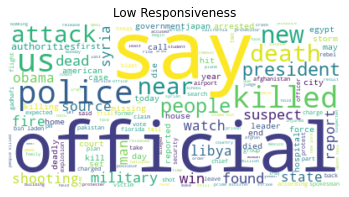

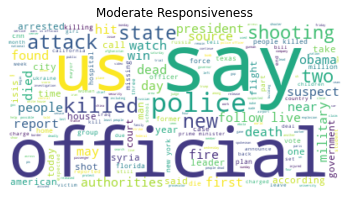

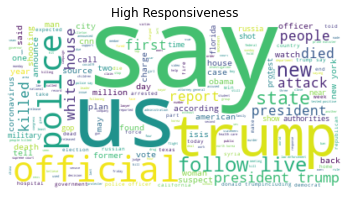

In [25]:
#low
wordcloud = WordCloud(background_color="white").generate(low_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Low Responsiveness')
plt.show()

#moderate
wordcloud = WordCloud(background_color="white").generate(moderate_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Moderate Responsiveness')
plt.show()

#high
wordcloud = WordCloud(background_color="white").generate(high_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('High Responsiveness')
plt.show()

# Tokenizer

In [26]:
# max_len=X_train.tweets_Text.map(lambda x: len(x)).max()
max_len = 150
print(max_len)

150


In [27]:
def get_tweetText(data):
    data_text=data[['tweets_Text']]
    return data_text

In [28]:
train_text=get_tweetText(X_train)
val_text=get_tweetText(X_val)

In [29]:
max_features=25000

In [30]:
from keras.utils import to_categorical
def tokenizer_(train_x, val_x, max_features, maxlen):
    

    train_X = train_x['tweets_Text']
    val_X = val_x['tweets_Text']
    

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(train_X))

    train_X = tokenizer.texts_to_sequences(train_X)
    train_X = pad_sequences(train_X, maxlen=maxlen)
    val_X = tokenizer.texts_to_sequences(val_X)
    val_X = pad_sequences(val_X, maxlen=maxlen)

    return train_X, val_X, tokenizer

In [31]:
train_X_tokenized, val_X_tokenized , tokenizer= tokenizer_(X_train, X_val, max_features, max_len)

Label Encoding 

In [32]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.transform(y_val)
##THESE are the final labels
train_Y = to_categorical(y_train_le)
val_Y = to_categorical(y_val_le)

Complete dataframe

In [33]:
#X_train_new = X_train.reset_index(drop=True)
#train_X_tokenized_new = train_X_tokenized.reset_index(drop=True)

In [34]:
#X_val_new = X_val.reset_index(drop=True)
#val_X_tokenized_new = val_X_tokenized.reset_index(drop=True)

In [35]:
X_train_new=X_train[:]
X_val_new=X_val[:]

In [36]:
X_train_new.drop(["tweets_Text"], axis=1, inplace=True)
X_val_new.drop(["tweets_Text"], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
X_train_new.head()

,has_image,has_Link
17339,0,0
12732,0,0
43991,1,0
20252,0,0
6025,0,0


In [38]:
X_train_new = X_train_new.loc[:, ~X_train_new.columns.str.contains('^Unnamed')]

In [39]:
X_val_new = X_val_new.loc[:, ~X_val_new.columns.str.contains('^Unnamed')]

In [40]:
X_train_new.to_numpy()
X_val_new.to_numpy()

array([[1, 0],
       [1, 1],
       [0, 0],
       ...,
       [1, 1],
       [1, 0],
       [1, 0]])

In [41]:
X_train_new[:4]

,has_image,has_Link
17339,0,0
12732,0,0
43991,1,0
20252,0,0


In [42]:
X_train_df=np.concatenate(( train_X_tokenized, X_train_new), axis=1)


In [43]:
X_val_df=np.concatenate((val_X_tokenized, X_val_new), axis=1)

In [44]:
X_train_df[:4]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [45]:
# X_val_df=np.concatenate((X_val_new, val_X_tokenized), axis=1)

In [46]:
X_val_df.shape

(8840, 152)

# Models

Logistic Regression

In [47]:
clf = LogisticRegression(max_iter=50000)
clf.fit(train_X_tokenized, y_train)
y_pred_lr = clf.predict(val_X_tokenized)


In [48]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.4279411764705882
0.38625232401513787


Decision Tree

In [49]:
clf = DecisionTreeClassifier()
clf.fit(train_X_tokenized, y_train)
clf.score(val_X_tokenized, y_val)

0.38653846153846155

In [50]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.38653846153846155
0.38625232401513787


SVM

In [51]:
clf = SVC()
clf.fit(train_X_tokenized, y_train)
clf.score(val_X_tokenized, y_val)

0.4305429864253394

In [52]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.4305429864253394
0.38625232401513787


Neural Network

In [53]:
clf = MLPClassifier(random_state=1, max_iter=1000)
clf.fit(train_X_tokenized, y_train)
clf.score(val_X_tokenized, y_val)

0.43993212669683257

In [54]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.43993212669683257
0.38625232401513787


Random Forest

In [55]:
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(train_X_tokenized, y_train)
clf.score(val_X_tokenized, y_val)

0.45294117647058824

In [56]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.45294117647058824
0.38625232401513787


In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Sequential
from keras import layers
from keras import models

**Feature SET**



Tweets Only Train_X: **train_X_tokenized**


Tweets Only Val_X: **val_X_tokenized**

Tweets, Image, hasLink Train_X: **X_train_df**

Tweets, Image, hasLink Val_X: **X_val_df**

Training Label: **train_Y**

Validation Label: **val_Y**

In [58]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 1. Vanilla RNN 

# 1.1 Feature:Only Tweet Text

The feature set only has the tweet

In [59]:
vanilla_rnn = models.Sequential()
vanilla_rnn.add(layers.Embedding(max_features, 8, input_length=max_len))
vanilla_rnn.add(layers.SimpleRNN(128))
#vanilla_rnn.add(layers.Flatten())
vanilla_rnn.add(layers.Dense(3, activation='softmax'))
vanilla_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 8)            200000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               17536     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 217,923
Trainable params: 217,923
Non-trainable params: 0
_________________________________________________________________


In [60]:
# vanilla_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vanilla_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = vanilla_rnn.fit(train_X_tokenized,
                    train_Y, 
                    batch_size=100, 
                    epochs=20, 
                    validation_data=(val_X_tokenized, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/20
354/354 [==============================] - 33s 94ms/step - loss: 1.0738 - acc: 0.4023 - f1_m: 0.1030 - precision_m: 0.2706 - recall_m: 0.0696 - val_loss: 1.0095 - val_acc: 0.4795 - val_f1_m: 0.2985 - val_precision_m: 0.6360 - val_recall_m: 0.1961
Epoch 2/20
354/354 [==============================] - 33s 94ms/step - loss: 0.9287 - acc: 0.5584 - f1_m: 0.4220 - precision_m: 0.6809 - recall_m: 0.3188 - val_loss: 0.9282 - val_acc: 0.5379 - val_f1_m: 0.4728 - val_precision_m: 0.6152 - val_recall_m: 0.3851
Epoch 3/20
354/354 [==============================] - 33s 95ms/step - loss: 0.9299 - acc: 0.5480 - f1_m: 0.3805 - precision_m: 0.7120 - recall_m: 0.2984 - val_loss: 1.3545 - val_acc: 0.4415 - val_f1_m: 0.4227 - val_precision_m: 0.4583 - val_recall_m: 0.3926
Epoch 4/20
354/354 [==============================] - 34s 95ms/step - loss: 0.8166 - acc: 0.6211 - f1_m: 0.5357 - precision_m: 0.7250 - recall_m: 0.4453 - val_loss: 0.8944 - val_acc: 0.5690 - val_f1_m: 0.5215 - val_precision_m

In [61]:
loss, accuracy, f1_score, precision, recall = vanilla_rnn.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

1.5181849002838135 0.49242082238197327 0.4874219000339508 0.49843430519104004 0.4772111773490906


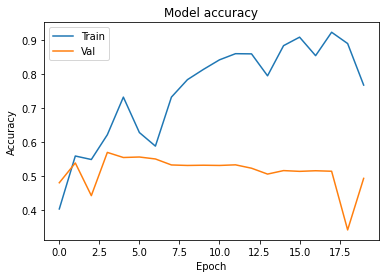

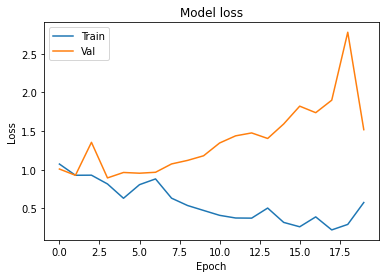

In [62]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 1.2  Feature: Tweets+ links and image column

In [63]:
vanilla_rnn2 = models.Sequential()
vanilla_rnn2.add(layers.Embedding(max_features, 8, input_length=max_len+2))
vanilla_rnn2.add(layers.SimpleRNN(128))
#vanilla_rnn.add(layers.Flatten())
vanilla_rnn2.add(layers.Dense(3, activation='softmax'))
vanilla_rnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 152, 8)            200000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               17536     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 217,923
Trainable params: 217,923
Non-trainable params: 0
_________________________________________________________________


In [64]:
vanilla_rnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = vanilla_rnn2.fit(X_train_df,
                    train_Y, 
                    batch_size=100, 
                    epochs=20, 
                    validation_data=(X_val_df, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/20
354/354 [==============================] - 34s 96ms/step - loss: 0.9312 - accuracy: 0.5370 - f1_m: 0.4006 - precision_m: 0.6023 - recall_m: 0.3131 - val_loss: 0.8311 - val_accuracy: 0.6078 - val_f1_m: 0.5272 - val_precision_m: 0.7047 - val_recall_m: 0.4223
Epoch 2/20
354/354 [==============================] - 34s 96ms/step - loss: 0.7545 - accuracy: 0.6549 - f1_m: 0.6130 - precision_m: 0.7123 - recall_m: 0.5396 - val_loss: 0.8418 - val_accuracy: 0.5905 - val_f1_m: 0.5590 - val_precision_m: 0.6329 - val_recall_m: 0.5011
Epoch 3/20
354/354 [==============================] - 34s 95ms/step - loss: 0.7022 - accuracy: 0.6957 - f1_m: 0.6712 - precision_m: 0.7330 - recall_m: 0.6274 - val_loss: 1.0617 - val_accuracy: 0.4052 - val_f1_m: 0.0128 - val_precision_m: 0.4438 - val_recall_m: 0.0065
Epoch 4/20
354/354 [==============================] - 33s 94ms/step - loss: 0.8124 - accuracy: 0.6105 - f1_m: 0.5081 - precision_m: 0.6973 - recall_m: 0.4434 - val_loss: 0.9373 - val_accuracy: 0.5

In [65]:
loss, accuracy, f1_score, precision, recall = vanilla_rnn2.evaluate(X_val_df, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

1.0572623014450073 0.5590497851371765 0.5528001189231873 0.5660378336906433 0.5406137108802795


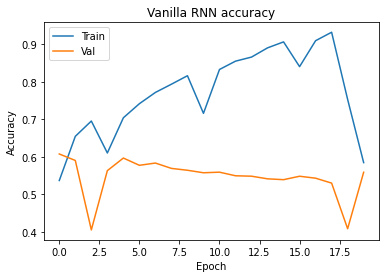

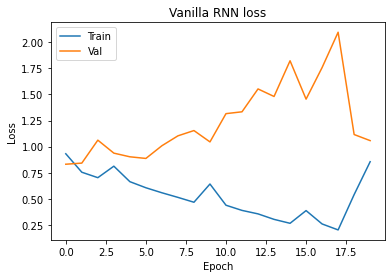

In [66]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Vanilla RNN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Vanilla RNN loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 2. LSTM

2.1 Feature: Only Tweet Text

2.2 Feature: Tweet Text+ Image and hasLink cols

In [67]:
model = Sequential()

# Input / Embdedding
model.add(Embedding(max_features,100,mask_zero=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32,return_sequences=False))

# Output layer
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         2500000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 2,554,755
Trainable params: 2,554,755
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='loss', min_delta=0, patience = 4)
history = model.fit(X_train_df, 
                    train_Y, 
                    batch_size=100, 
                    epochs=10, 
                    validation_data=(X_val_df, val_Y),
                    callbacks=callbacks
                    )

Epoch 1/10
354/354 [==============================] - 222s 628ms/step - loss: 0.8916 - accuracy: 0.5631 - f1_m: 0.4403 - precision_m: 0.6397 - recall_m: 0.3451 - val_loss: 0.8232 - val_accuracy: 0.6048 - val_f1_m: 0.5498 - val_precision_m: 0.6843 - val_recall_m: 0.4604
Epoch 2/10
354/354 [==============================] - 220s 622ms/step - loss: 0.6844 - accuracy: 0.6973 - f1_m: 0.6775 - precision_m: 0.7369 - recall_m: 0.6277 - val_loss: 0.8688 - val_accuracy: 0.5917 - val_f1_m: 0.5712 - val_precision_m: 0.6306 - val_recall_m: 0.5227
Epoch 3/10
354/354 [==============================] - 221s 624ms/step - loss: 0.5248 - accuracy: 0.7821 - f1_m: 0.7776 - precision_m: 0.8046 - recall_m: 0.7527 - val_loss: 0.9695 - val_accuracy: 0.5813 - val_f1_m: 0.5680 - val_precision_m: 0.5999 - val_recall_m: 0.5397
Epoch 4/10
288/354 [=======================>......] - ETA: 40s - loss: 0.3830 - accuracy: 0.8507 - f1_m: 0.8493 - precision_m: 0.8656 - recall_m: 0.8338

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 3. LSTM+ GloVe Embeddings

In [69]:
vocab_size = len(tokenizer.word_index) + 1

In [70]:
pwd

'/content'

In [75]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
#glove_file = open('gdrive/My Drive/HW3_CSE243/sentiment analysis assignment/glove.6B.100d.txt', encoding="utf8")
# glove_file = open('gdrive/My Drive/CSE_243/glove.twitter.27B.100d.txt', encoding="utf8")

# glove_file = open('Twitter_GLoVe_Embeddings/glove.twitter.27B.100d.txt', encoding="utf8")
# glove_file = open('Twitter_GLoVe_Embeddings/glove.twitter.27B.50d.txt', encoding="utf8")
glove_file = open('/content/drive/My Drive/CSE243/glove.twitter.27B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()


In [88]:
glove_dim = 100

100

In [80]:
glove_dim

100

In [81]:
embedding_matrix = zeros((vocab_size, glove_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

3.1 Architecture 1: Feature: Only 

In [89]:
glove_model = models.Sequential()
glove_model.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False))
glove_model.add(layers.Dropout(0.4))
#glove_model.add(layers.LSTM(64))
glove_model.add(LSTM(64,return_sequences=True))
glove_model.add(layers.Dropout(0.3))
glove_model.add(LSTM(32,return_sequences=False))
#glove_model.add(layers.Dense(10,activation="relu"))
glove_model.add(layers.Dropout(0.2))
glove_model.add(Dense(3, activation='softmax'))
glove_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 150, 100)          2901100   
_________________________________________________________________
dropout_3 (Dropout)          (None, 150, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 150, 64)           42240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 150, 64)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

In [91]:
glove_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = glove_model.fit(train_X_tokenized, 
                    train_Y, 
                    batch_size=100, 
                    epochs=150, 
                    validation_data=(val_X_tokenized, val_Y),
                    shuffle=True
                    #callbacks=callbacks
                    )

Epoch 1/150
354/354 [==============================] - 7s 20ms/step - loss: 1.0090 - accuracy: 0.4720 - f1_m: 0.2983 - precision_m: 0.5687 - recall_m: 0.2063 - val_loss: 0.9552 - val_accuracy: 0.5148 - val_f1_m: 0.4100 - val_precision_m: 0.6240 - val_recall_m: 0.3062
Epoch 2/150
354/354 [==============================] - 6s 17ms/step - loss: 0.9663 - accuracy: 0.5091 - f1_m: 0.3695 - precision_m: 0.6440 - recall_m: 0.2609 - val_loss: 0.9536 - val_accuracy: 0.5174 - val_f1_m: 0.4267 - val_precision_m: 0.6094 - val_recall_m: 0.3293
Epoch 3/150
354/354 [==============================] - 6s 17ms/step - loss: 0.9466 - accuracy: 0.5235 - f1_m: 0.3886 - precision_m: 0.6591 - recall_m: 0.2774 - val_loss: 0.9194 - val_accuracy: 0.5360 - val_f1_m: 0.4001 - val_precision_m: 0.6899 - val_recall_m: 0.2831
Epoch 4/150
354/354 [==============================] - 6s 17ms/step - loss: 0.9309 - accuracy: 0.5346 - f1_m: 0.4078 - precision_m: 0.6672 - recall_m: 0.2952 - val_loss: 0.9218 - val_accuracy: 0.5

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy, f1_score, precision, recall = glove_model.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Feature: Tweets+Image,hasLink

In [ ]:
glove_model_feature2 = models.Sequential()
glove_model_feature2.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model_feature2.add(LSTM(64,return_sequences=True))
# glove_model.add(layers.Dropout(0.3))
glove_model_feature2.add(LSTM(32,return_sequences=False))
glove_model.add(layers.Dropout(0.3))
#glove_model.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model_feature2.add(Dense(3, activation='softmax'))
glove_model_feature2.summary()

In [ ]:
glove_model_feature2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = glove_model_feature2.fit(X_train_df, 
                    train_Y, 
                    batch_size=100, 
                    epochs=30, 
                    validation_data=(X_val_df, val_Y)
                    #callbacks=callbacks
                    )

In [ ]:
loss, accuracy, f1_score, precision, recall = glove_model_feature2.evaluate(X_val_df, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Architecture 2**

In [ ]:
glove_model2 = models.Sequential()
glove_model2.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model2.add(LSTM(128,return_sequences=True))
glove_model2.add(layers.Dropout(0.3))
glove_model2.add(LSTM(64,return_sequences=True))
glove_model2.add(layers.Dropout(0.3))
glove_model2.add(LSTM(32,return_sequences=False))
glove_model2.add(layers.Dropout(0.3))
glove_model2.add(layers.Dense(10,activation="relu"))
#glove_model2.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model2.add(Dense(3, activation='softmax'))
glove_model2.summary()

In [ ]:
glove_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2.fit(train_X_tokenized, 
                    train_Y, 
                    batch_size=100, 
                    epochs=100, 
                    validation_data=(val_X_tokenized, val_Y)
                   
                    )

In [ ]:
loss, accuracy, f1_score, precision, recall = glove_model2.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Bi-Directional LSTM

In [92]:

glove_model3 = models.Sequential()
glove_model3.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False))

glove_model3.add(Bidirectional(layers.LSTM(128, return_sequences=True)))
glove_model3.add(Bidirectional(layers.LSTM(128)))

# glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(64, return_sequences=True)))
# glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(64)))

glove_model3.add(layers.Dense(10,activation="relu"))
glove_model3.add(Dense(3, activation='softmax'))
glove_model3.summary()





Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 150, 100)          2901100   
_________________________________________________________________
bidirectional (Bidirectional (None, 150, 256)          234496    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
Total params: 3,532,439
Trainable params: 631,339
Non-trainable params: 2,901,100
_________________________________________________________________


In [93]:
glove_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model3.fit(train_X_tokenized, 
                    train_Y, 
                    batch_size=100, 
                    epochs=50, 
                    validation_data=(val_X_tokenized, val_Y)
                    )

Epoch 1/50
354/354 [==============================] - 21s 60ms/step - loss: 0.9737 - accuracy: 0.5037 - f1_m: 0.3601 - precision_m: 0.6184 - recall_m: 0.2586 - val_loss: 0.9388 - val_accuracy: 0.5344 - val_f1_m: 0.3801 - val_precision_m: 0.6821 - val_recall_m: 0.2648
Epoch 2/50
354/354 [==============================] - 20s 57ms/step - loss: 0.9219 - accuracy: 0.5418 - f1_m: 0.4271 - precision_m: 0.6664 - recall_m: 0.3163 - val_loss: 0.9158 - val_accuracy: 0.5456 - val_f1_m: 0.4519 - val_precision_m: 0.6547 - val_recall_m: 0.3462
Epoch 3/50
354/354 [==============================] - 20s 57ms/step - loss: 0.8877 - accuracy: 0.5634 - f1_m: 0.4617 - precision_m: 0.6828 - recall_m: 0.3507 - val_loss: 0.8997 - val_accuracy: 0.5498 - val_f1_m: 0.4596 - val_precision_m: 0.6738 - val_recall_m: 0.3499
Epoch 4/50
354/354 [==============================] - 20s 56ms/step - loss: 0.8554 - accuracy: 0.5814 - f1_m: 0.4957 - precision_m: 0.6935 - recall_m: 0.3880 - val_loss: 0.8993 - val_accuracy: 0.5

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy, f1_score, precision, recall = glove_model2.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()  

**Feature: Tweets+Image,hasLink**

In [ ]:
glove_model2_feature2 = models.Sequential()
glove_model2_feature2.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model2_feature2.add(LSTM(128,return_sequences=True))
glove_model2.add(layers.Dropout(0.8))
glove_model2_feature2.add(LSTM(64,return_sequences=True))
glove_model2.add(layers.Dropout(0.3))
glove_model2_feature2.add(LSTM(32,return_sequences=False))
glove_model2.add(layers.Dropout(0.3))
glove_model2_feature2.add(layers.Dense(10,activation="relu"))
#glove_model2.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model2_feature2.add(Dense(3, activation='softmax'))
glove_model2_feature2.summary()

In [ ]:
X_train_df.shape

In [ ]:
glove_model2_feature2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2_feature2.fit(X_train_df, 
                    train_Y, 
                    batch_size=100, 
                    epochs=50, 
                    validation_data=(X_val_df, val_Y)
                   
                    )

In [ ]:
loss, accuracy, f1_score, precision, recall = glove_model2_feature2.evaluate(X_val_df, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Multi-channel CNN Model on 1 Feature only


In [98]:
from keras.layers.merge import concatenate
# channel 1
inputs1 = layers.Input(shape=(max_len,))
embedding1 = layers.Embedding(vocab_size, 100)(inputs1)
conv1 = layers.Conv1D(filters=64, kernel_size=4, activation='relu')(embedding1)
drop1 = layers.Dropout(0.5)(conv1)
pool1 = layers.MaxPooling1D(pool_size=2)(drop1)
flat1 = layers.Flatten()(pool1)
# channel 2
inputs2 = layers.Input(shape=(max_len,))
embedding2 = layers.Embedding(vocab_size, 100)(inputs2)
conv2 = layers.Conv1D(filters=64, kernel_size=6, activation='relu')(embedding2)
drop2 = layers.Dropout(0.5)(conv2)
pool2 = layers.MaxPooling1D(pool_size=2)(drop2)
flat2 = layers.Flatten()(pool2)
# channel 3
inputs3 = layers.Input(shape=(max_len,))
embedding3= layers.Embedding(vocab_size, 100)(inputs3)
conv3 = layers.Conv1D(filters=64, kernel_size=8, activation='relu')(embedding3)
drop3 = layers.Dropout(0.5)(conv3)
pool3 = layers.MaxPooling1D(pool_size=2)(drop3)
flat3 = layers.Flatten()(pool3)
# merge
merged = concatenate([flat1, flat2, flat3])
# interpretation
dense1 = layers.Dense(10, activation='relu')(merged)
outputs = layers.Dense(3, activation='softmax')(dense1)
model_cnn = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
# summarize
print(model_cnn.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 150, 100)     2901100     input_7[0][0]                    
_______________________________________________________________________________________

In [99]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

history = model.fit([train_X_tokenized,train_X_tokenized,train_X_tokenized], 
                    train_Y, 
                    batch_size=512, 
                    epochs=150, 
                    validation_data=([val_X_tokenized,val_X_tokenized,val_X_tokenized], val_Y),
                    shuffle=True
)

Epoch 1/150
70/70 [==============================] - 48s 685ms/step - loss: 0.1133 - accuracy: 0.9613 - f1_m: 0.9620 - precision_m: 0.9683 - recall_m: 0.9559 - val_loss: 2.1626 - val_accuracy: 0.5612 - val_f1_m: 0.5585 - val_precision_m: 0.5643 - val_recall_m: 0.5528
Epoch 2/150
70/70 [==============================] - 48s 688ms/step - loss: 0.0769 - accuracy: 0.9743 - f1_m: 0.9747 - precision_m: 0.9792 - recall_m: 0.9702 - val_loss: 2.5285 - val_accuracy: 0.5593 - val_f1_m: 0.5557 - val_precision_m: 0.5602 - val_recall_m: 0.5514
Epoch 3/150
70/70 [==============================] - 48s 681ms/step - loss: 0.0599 - accuracy: 0.9799 - f1_m: 0.9806 - precision_m: 0.9846 - recall_m: 0.9767 - val_loss: 2.7471 - val_accuracy: 0.5576 - val_f1_m: 0.5543 - val_precision_m: 0.5581 - val_recall_m: 0.5506
Epoch 4/150
70/70 [==============================] - 48s 684ms/step - loss: 0.0480 - accuracy: 0.9838 - f1_m: 0.9844 - precision_m: 0.9874 - recall_m: 0.9815 - val_loss: 2.9969 - val_accuracy: 0.5

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy, f1_score, precision, recall = model_cnn.evaluate([val_X_tokenized,val_X_tokenized,val_X_tokenized], val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Features: TweetText + Likes + Retweets

In [ ]:
data_long = pd.read_csv('CSE243-TweetResponsePrediction/Data-new/Data-clean/2011-2020_all_cols.csv')

In [ ]:
data_long.head()

In [ ]:
data_long.dropna(subset=['tweets_Text'], inplace=True) 

In [ ]:
labels_long = data_long["tweets_ResponseCategory"]
data_long.drop("tweets_ResponseCategory", axis=1, inplace=True)

In [ ]:
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(data_long, labels, test_size=0.20, random_state=42)

In [ ]:
train_text_l = get_tweetText(X_train_l)
val_text_l = get_tweetText(X_val_l)


train_X_tokenized_l, val_X_tokenized_l, tokenizer_l = tokenizer_(X_train_l, X_val_l, max_features, max_len)


In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le_l = le.fit_transform(y_train_l)
y_val_le_l = le.transform(y_val_l)
##THESE are the final labels
train_Y_l = to_categorical(y_train_le_l)
val_Y_l = to_categorical(y_val_le_l)

In [ ]:
X_train_l.head()

In [ ]:
X_train_new_l = X_train_l[:]
X_val_new_l = X_val_l[:]


In [ ]:
X_train_new_l.drop(["tweets_Text", "tweets_Date", "tweets_Replies", "has_image", "has_Link"], axis=1, inplace=True)
X_val_new_l.drop(["tweets_Text", "tweets_Date", "tweets_Replies", "has_image", "has_Link"], axis=1, inplace=True)


In [ ]:
X_val_new_l.head()


In [ ]:
X_val_new_l['tweets_Likes'] = X_val_new_l['tweets_Likes'].fillna(0) 
X_val_new_l['tweets_Retweets'] = X_val_new_l['tweets_Retweets'].fillna(0) 

X_train_new_l['tweets_Likes'] = X_train_new_l['tweets_Likes'].fillna(0) 
X_train_new_l['tweets_Retweets'] = X_train_new_l['tweets_Retweets'].fillna(0) 

In [ ]:
X_val_new_l['tweets_Likes'] = X_val_new_l['tweets_Likes'].astype(np.int64)
X_val_new_l['tweets_Retweets'] = X_val_new_l['tweets_Retweets'].astype(np.int64)

X_train_new_l['tweets_Likes'] = X_train_new_l['tweets_Likes'].astype(np.int64)
X_train_new_l['tweets_Retweets'] = X_train_new_l['tweets_Retweets'].astype(np.int64)


In [ ]:
X_train_new_l['tweets_Likes'] = (X_train_new_l['tweets_Likes'] - X_train_new_l['tweets_Likes'].min()) / (X_train_new_l['tweets_Likes'].max() - X_train_new_l['tweets_Likes'].min())
X_train_new_l['tweets_Retweets'] = (X_train_new_l['tweets_Retweets'] - X_train_new_l['tweets_Retweets'].min()) / (X_train_new_l['tweets_Retweets'].max() - X_train_new_l['tweets_Retweets'].min())

X_val_new_l['tweets_Likes'] = (X_val_new_l['tweets_Likes'] - X_val_new_l['tweets_Likes'].min()) / (X_val_new_l['tweets_Likes'].max() - X_val_new_l['tweets_Likes'].min())
X_val_new_l['tweets_Retweets'] = (X_val_new_l['tweets_Retweets'] - X_val_new_l['tweets_Retweets'].min()) / (X_val_new_l['tweets_Retweets'].max() - X_val_new_l['tweets_Retweets'].min())



In [ ]:
X_train_new_l.head()

In [ ]:
X_val_new_l.head()

In [ ]:

X_train_new_l.to_numpy()
X_val_new_l.to_numpy()

X_train_df_l = np.concatenate(( train_X_tokenized_l, X_train_new_l), axis=1)
X_val_df_l = np.concatenate(( val_X_tokenized_l, X_val_new_l), axis=1)

# X_val_df_l = np.concatenate(( X_val_new_l, val_X_tokenized_l), axis=1)



In [ ]:
X_train_df_l.shape

Model (Best Working Architecture) from previous experiments

In [ ]:
glove_model2_fs3 = models.Sequential()
glove_model2_fs3.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))
#glove_model2_fs3.add(layers.LSTM(64))
glove_model2_fs3.add(LSTM(128,return_sequences=True))
glove_model2_fs3.add(layers.Dropout(0.3))
glove_model2_fs3.add(LSTM(64,return_sequences=True))
glove_model2_fs3.add(layers.Dropout(0.3))
glove_model2_fs3.add(LSTM(32,return_sequences=False))
glove_model2_fs3.add(layers.Dropout(0.3))
glove_model2_fs3.add(layers.Dense(10,activation="relu"))
#glove_model2_fs3.add(layers.Dense(10,activation="relu"))
#glove_model2_fs3.add(layers.Dropout(0.2))
glove_model2_fs3.add(Dense(3, activation='softmax'))
glove_model2_fs3.summary()



In [ ]:
glove_model2_fs3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2_fs3.fit(X_train_df_l, 
                    train_Y_l, 
                    batch_size=100, 
                    epochs=100, 
                    validation_data=(X_val_df_l, val_Y_l)
                    )



In [ ]:
# # Input for variable-length sequences of integers
# inputs = keras.Input(shape=(None,), dtype="int32")
# # Embed each integer in a 128-dimensional vector
# x = layers.Embedding(max_features, 128)(inputs)
# # Add 2 bidirectional LSTMs
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# x = layers.Bidirectional(layers.LSTM(64))(x)
# # Add a classifier
# outputs = layers.Dense(1, activation="sigmoid")(x)
# model = keras.Model(inputs, outputs)
# model.summary()


glove_model2_fs3_bi_d = models.Sequential()
glove_model2_fs3_bi_d.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))

glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(128, return_sequences=True)))
glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(128)))


# glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(64, return_sequences=True)))
# glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(64)))


glove_model2_fs3_bi_d.add(layers.Dense(10,activation="relu"))
glove_model2_fs3_bi_d.add(Dense(3, activation='softmax'))
glove_model2_fs3_bi_d.summary()





In [ ]:
glove_model2_fs3_bi_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2_fs3_bi_d.fit(X_train_df_l, 
                    train_Y_l, 
                    batch_size=100, 
                    epochs=10, 
                    validation_data=(X_val_df_l, val_Y_l)
                    )

